# CIFAR-10 with CNN (Convolutional Neural Network)

In [66]:
from __future__ import print_function

import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense
from keras.layers import Dropout, Input
from keras.datasets import cifar10
from random import randint

### preprocess the dataset

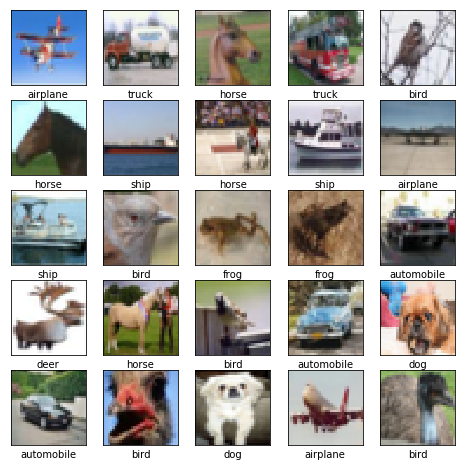

In [67]:
(x_train,y_train), (x_test,y_test) = cifar10.load_data()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(8,8))
for i in range(25):
    indexes = randint(0,50000)
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[indexes], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[indexes][0]])
plt.show()

In [68]:
image_size = x_train.shape[1]
x_train = np.reshape(x_train,[-3,image_size,image_size,3])
x_test = np.reshape(x_test,[-3,image_size,image_size,3])
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### parameters

In [69]:
num_labels = len(np.unique(y_train))
input_shape = (image_size,image_size,3)
kernel_size = 3
epochs = 50
dropout = 0.3
n_filters = 32
batch_size = 32

### building the model

In [72]:
inputs = Input(shape=input_shape)
def build_model():
    filters = n_filters
    for i in range(3):
        cnn = Conv2D(filters=filters, kernel_size=kernel_size, activation='relu')(inputs)
        cnn = Dropout(dropout)(cnn)
        cnn = MaxPooling2D()(cnn)
        filters *= 2
    
    cnn = Flatten()(cnn)
    cnn = Dropout(dropout)(cnn)
    outputs = Dense(num_labels, activation='softmax')(cnn)
    return Model(inputs=inputs, outputs=outputs)

model = build_model()
model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 30, 30, 128)       3584      
_________________________________________________________________
dropout_31 (Dropout)         (None, 30, 30, 128)       0         
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 15, 15, 128)       0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 28800)             0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 28800)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                2880

### training

In [78]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=epochs, validation_data = (x_test, y_test), batch_size=batch_size)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 79s 2ms/step - loss: 0.9075 - accuracy: 0.7063 - val_loss: 1.0936 - val_accuracy: 0.6440
Epoch 2/50
50000/50000 [==============================] - 84s 2ms/step - loss: 0.8833 - accuracy: 0.7079 - val_loss: 1.0908 - val_accuracy: 0.6450
Epoch 3/50
50000/50000 [==============================] - 84s 2ms/step - loss: 0.8795 - accuracy: 0.7091 - val_loss: 1.1236 - val_accuracy: 0.6254
Epoch 4/50
50000/50000 [==============================] - 86s 2ms/step - loss: 0.8622 - accuracy: 0.7132 - val_loss: 1.1151 - val_accuracy: 0.6328
Epoch 5/50
50000/50000 [==============================] - 88s 2ms/step - loss: 0.8427 - accuracy: 0.7207 - val_loss: 1.0811 - val_accuracy: 0.6423
Epoch 6/50
50000/50000 [==============================] - 90s 2ms/step - loss: 0.8399 - accuracy: 0.7182 - val_loss: 1.1139 - val_accuracy: 0.6357
Epoch 7/50
50000/50000 [==============================] - 90s 2ms/st

### model evaluation

In [79]:
score = model.evaluate(x_test,y_test)
print("\nTEST ACCURACY: %.2f%%" % (100*score[1]))

10000/10000 [==============================] - 2s 193us/step

TEST ACCURACY: 64.93%


### let's make some random prediction

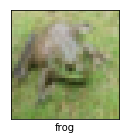

Prediction =  2  Image =  frog 6




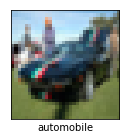

Prediction =  1  Image =  automobile 1




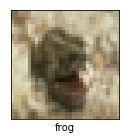

Prediction =  6  Image =  frog 6




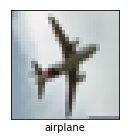

Prediction =  4  Image =  airplane 0




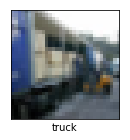

Prediction =  9  Image =  truck 9




In [109]:
class_number = [0,1,2,3,4,5,6,7,8,9]
for i in range(5):
    plt.figure(figsize=(2,2))
    image_index = randint(0,10000)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[image_index].reshape(image_size,image_size,3),cmap=plt.cm.binary)
    plt.xlabel(class_names[y_test[image_index][0]])
    plt.show()
    pred = model.predict(x_test[image_index].reshape(-3,image_size,image_size,3))
    print("Prediction = ", pred.argmax(), " Image = ", class_names[y_test[image_index][0]],
          class_number[y_test[image_index][0]])
    print("\n")

### last comment

As we can see, after 50 epochs we get nearly 65% of validation accuracy (which still underfitting).
In this test, with 5 random test data, we get 3/5 correct answer.